In [173]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.lines as mlines



%matplotlib inline

In [2]:
# Make sure you read postal codes as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 
plz_shape_df = gpd.read_file('Data/plz-gebiete.shp', dtype={'plz': str})
plz_shape_df.head()

# The geometry column contains the polygons which define the postal code’s shape.

,plz,note,geometry
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ..."
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ..."
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ..."
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ..."


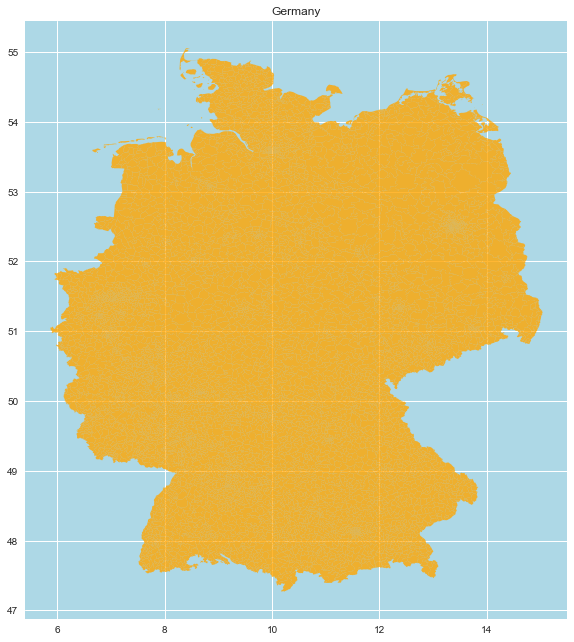

In [3]:
# We can use geopandas mapping tools to generate the map with the plot method.
plt.rcParams['figure.figsize'] = [16, 11]

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)
ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
);

In [4]:
df = pd.read_csv("/Users/GabrielNutzer/Green_Energy_Locations/data/sample_addedinfo.csv")
print(df.head(20))
df.info()a

    date     id  temp count  temp mean  temp std  temp min  temp max  \
0    9.0  D4405         0.0        NaN       NaN       NaN       NaN   
1    3.0  D5132         0.0        NaN       NaN       NaN       NaN   
2    4.0  D5416         0.0        NaN       NaN       NaN       NaN   
3    7.0  D3687         0.0        NaN       NaN       NaN       NaN   
4    5.0  D5453         0.0        NaN       NaN       NaN       NaN   
5    5.0  10633      2229.0  15.040108  5.389736       1.8      30.2   
6   12.0  10289      2232.0   3.324955  2.813421      -2.7      12.3   
7    3.0  D5763         0.0        NaN       NaN       NaN       NaN   
8    4.0  D2292         0.0        NaN       NaN       NaN       NaN   
9    4.0  10569      2160.0  10.140602  6.421316      -8.2      27.7   
10   9.0  D3164      2023.0  14.266189  5.873158      -0.7      30.7   
11   2.0  D5300      1792.0   2.018080  4.535567     -11.8      14.4   
12   6.0  D4160      2160.0  17.203889  5.047590       4.8      

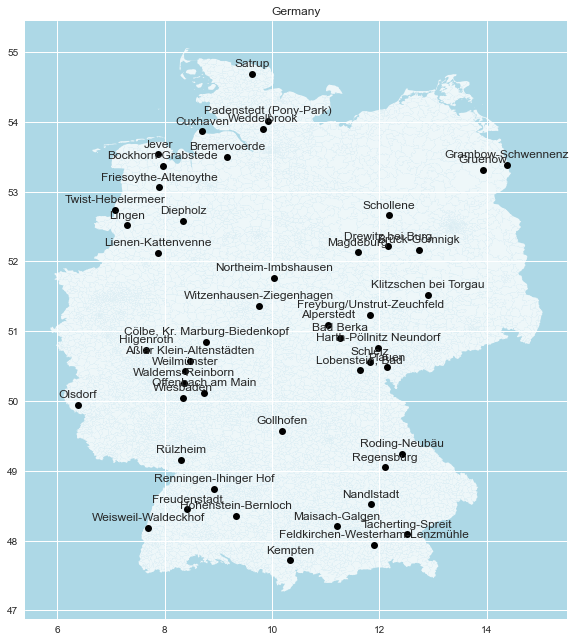

In [7]:
# We can use geopandas mapping tools to generate the map with the plot method.
plt.rcParams['figure.figsize'] = [16, 11]

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='white', alpha=0.8)

for c in stations_new.keys():
     # Plot city name.
    ax.text(
        x=stations_new[c][1], 
        # Add small shift to avoid overlap with point.
        y=stations_new[c][0]+0.1, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        float(stations_new[c][1]), 
        float(stations_new[c][0]), 
        marker='o',
        c='black', 
        alpha=1
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
);

In [109]:
solar_df_to_map = pd.read_csv('/Users/GabrielNutzer/Desktop/Studium/Master/2.Semester/Business Analytics A/Green_Energy_Locations/data/solar_df_to_map_addedinfo.csv')
print(solar_df_to_map.head(10))
solar_df_to_map.info()

      id  sunhours per day  is clear_mean  is clear_std  suited for PV  \
0  10015          5.015488       0.188839      0.366793              0   
1  10020          5.039992       0.178221      0.366341              0   
2  10022          4.698720       0.167444      0.358511              0   
3  10028          5.303592       0.187918      0.374263              0   
4  10035          4.907065       0.163400      0.352632              0   
5  10042          5.279327       0.236902      0.404823              1   
6  10046          5.451037       0.260464      0.416083              1   
7  10055          5.386837       0.196666      0.378771              2   
8  10091          5.782533       0.214371      0.385879              2   
9  10093          5.507513       0.216469      0.389773              2   

   highlight                location region  \
0      False       (54.1833, 7.9, 4)     SH   
1      False   (55.0167, 8.4167, 26)     SH   
2      False         (54.8, 8.95, 7)     SH 

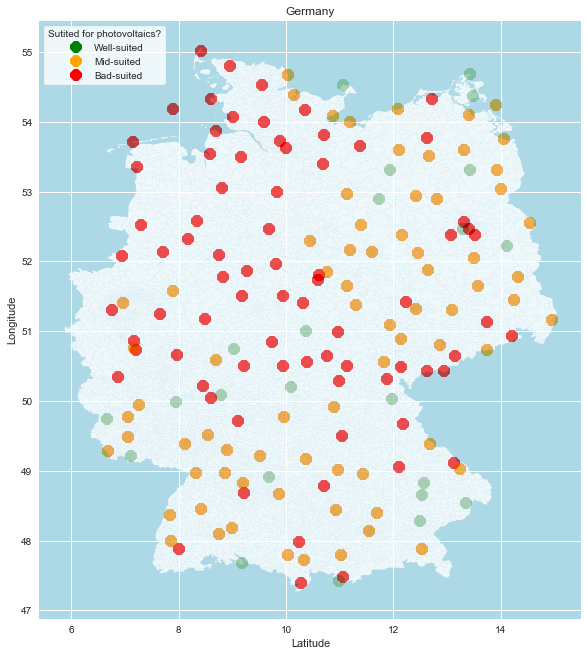

In [206]:
# Plot stations in different colours, depending on the "suitable for PV"
plt.rcParams['figure.figsize'] = [16, 11]

fig, ax = plt.subplots()

plz_shape_df.plot(
    ax=ax, 
    color='white', 
    alpha=0.8, 
)


for value in solar_df_to_map["suited for PV"]:
    if value == 0:
        # create temporary table, filter table df by conditions
        temp_table = solar_df_to_map[solar_df_to_map["suited for PV"]==0]
        # Plot city location centroid for bad suited stations in red
        bad_suited =ax.plot(
            temp_table["longitude"], #longitude
            temp_table["latitude"], #latitude
            marker='8',
            markersize = 13,
            c='red', 
            alpha=0.01,
            linestyle="None" 
        )
        
    elif value == 1:
        temp_table = solar_df_to_map[solar_df_to_map["suited for PV"]==1]
        # Plot city location centroid for medium suited stations in orange
        mid_suited =ax.plot(
            temp_table["longitude"], #longitude
            temp_table["latitude"], #latitude 
            marker='8',
            markersize = 13,
            c='orange', 
            alpha=0.01,
            linestyle="None" 
        )
        
    elif value == 2:
        temp_table = solar_df_to_map[solar_df_to_map["suited for PV"]==2]
        # Plot city location centroid for well suited stations in green
        well_suited = ax.plot(
            temp_table["longitude"], #longitude
            temp_table["latitude"], #latitude 
            marker='8',
            markersize = 13,
            c='green', 
            alpha= 0.01 ,
            linestyle="None",
            label = 'well-suited'
        )
                
ax.set(
    title='Germany',
    xlabel = 'Latitude',
    ylabel = 'Longitude',
    aspect=1.3, 
    facecolor='lightblue'
)

green_line = mlines.Line2D([], [], color='green', marker='8',
                          markersize=13, label='Well-suited',linestyle="None")
orange_line = mlines.Line2D([], [], color='orange', marker='8',
                          markersize=13, label='Mid-suited',linestyle="None")
red_line = mlines.Line2D([], [], color='red', marker='8',
                          markersize=13, label='Bad-suited',linestyle="None")


plt.legend(handles=[green_line, orange_line, red_line],
           title = 'Sutited for photovoltaics?',
           facecolor = 'white',
           loc = 'upper left',
           fontsize = 'medium', 
           frameon = True 
           )
